<a href="https://colab.research.google.com/github/bcnishi/FAST-cesarschool/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn'
df = pd.read_csv(url)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###2. Análise exploratória
Faça uma exploração dos dados do dataset, procurando verificar:

a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
#transforma variaveis categoricas em numericas
le = LabelEncoder()
df[['Country','Status']] = df[['Country','Status']].apply(le.fit_transform)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


b) as informações estatísticas básicas das colunas do dataset;

In [ ]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,95.096324,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,56.244904,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,93.000000,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,145.000000,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.shape

(2938, 22)

c) se há dados faltantes e decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas as colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
BMI                                 34
thinness 1-19 years                 34
thinness 5-9 years                  34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
under-five deaths                    0
HIV/AIDS                             0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

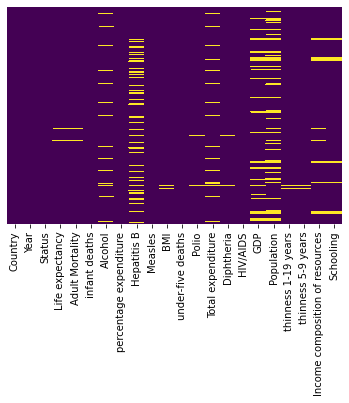

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis');

In [ ]:
df = df.drop(['Population','Hepatitis B','Total expenditure'], axis=1)
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
5,0,2010,1,58.8,279.0,74,0.01,79.679367,1989,16.7,102,66.0,66.0,0.1,553.328940,18.4,18.4,0.448,9.2
6,0,2009,1,58.6,281.0,77,0.01,56.762217,2861,16.2,106,63.0,63.0,0.1,445.893298,18.6,18.7,0.434,8.9
7,0,2008,1,58.1,287.0,80,0.03,25.873925,1599,15.7,110,64.0,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
8,0,2007,1,57.5,295.0,82,0.02,10.910156,1141,15.2,113,63.0,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
9,0,2006,1,57.3,295.0,84,0.03,17.171518,1990,14.7,116,58.0,58.0,0.1,272.563770,19.2,19.3,0.405,8.1


In [ ]:
df.isnull().sum().sort_values(ascending=False)

GDP                                448
Alcohol                            194
Income composition of resources    167
Schooling                          163
BMI                                 34
thinness 1-19 years                 34
thinness 5-9 years                  34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
HIV/AIDS                             0
under-five deaths                    0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

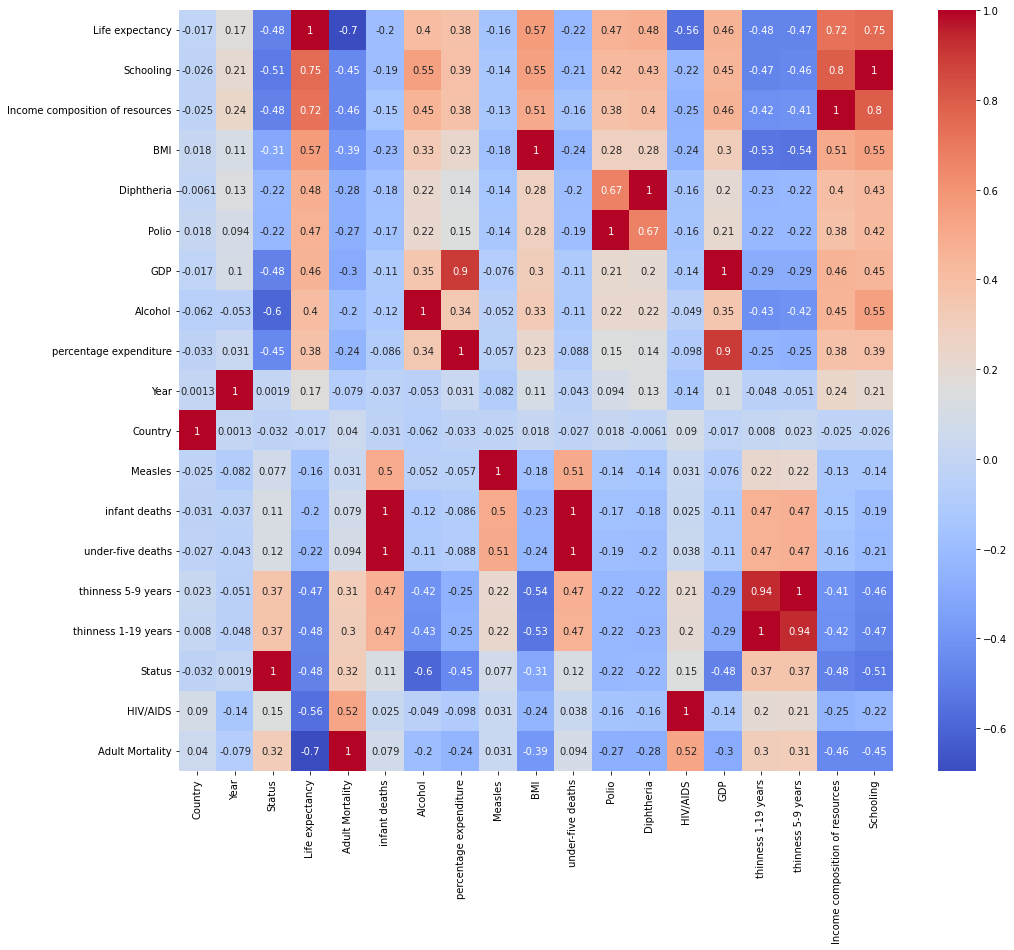

In [ ]:
corrmat = df.corr().sort_values('Life expectancy', ascending=False)
plt.subplots(figsize=(16,14))
sns.heatmap(corrmat,annot = True,cmap='coolwarm');

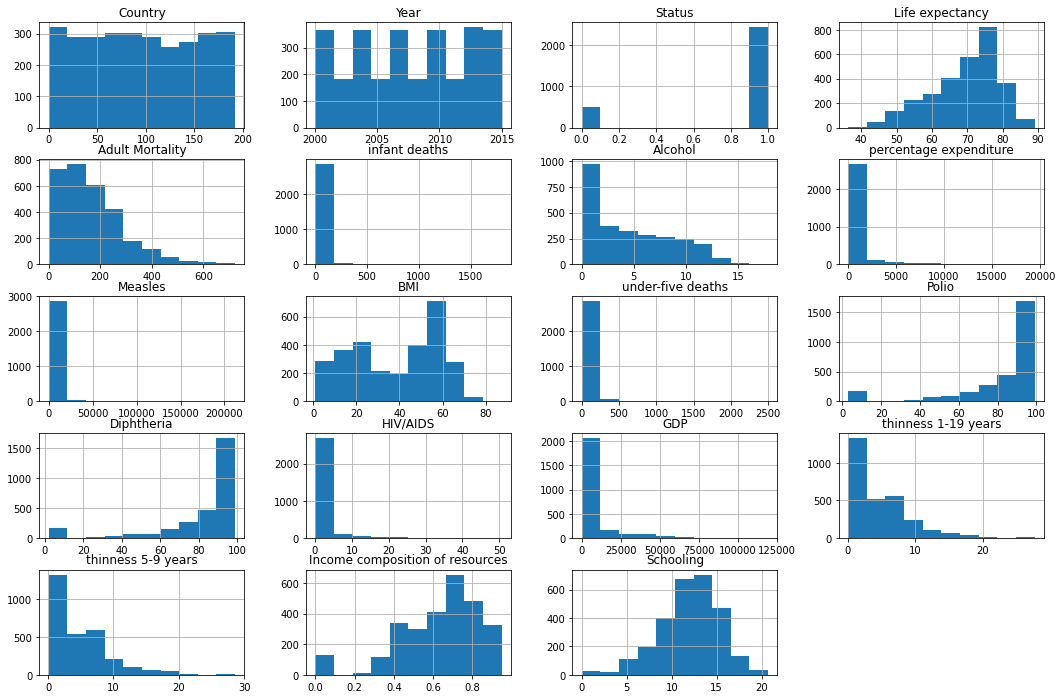

In [ ]:
df.hist(figsize=(18,12));

In [ ]:
df.dropna(subset=['Life expectancy'], inplace=True)

In [ ]:
df.shape

(2928, 19)

In [ ]:
df.columns[df.isnull().any()].tolist()

['Alcohol',
 'BMI',
 'Polio',
 'Diphtheria',
 'GDP',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
df.GDP.fillna(df.GDP.value_counts().mode(), inplace=True)
df.dropna(inplace=True)
df.shape

(2304, 19)

In [ ]:
#cols = df.columns[df.isnull().any()].tolist()
#df[cols]=df[cols].fillna(df.mean().iloc[0])

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Schooling                          0
Measles                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
BMI                                0
Income composition of resources    0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
thinness 5-9 years                 0
Country                            0
dtype: int64

d) a matriz de correlação das entradas com a saída;

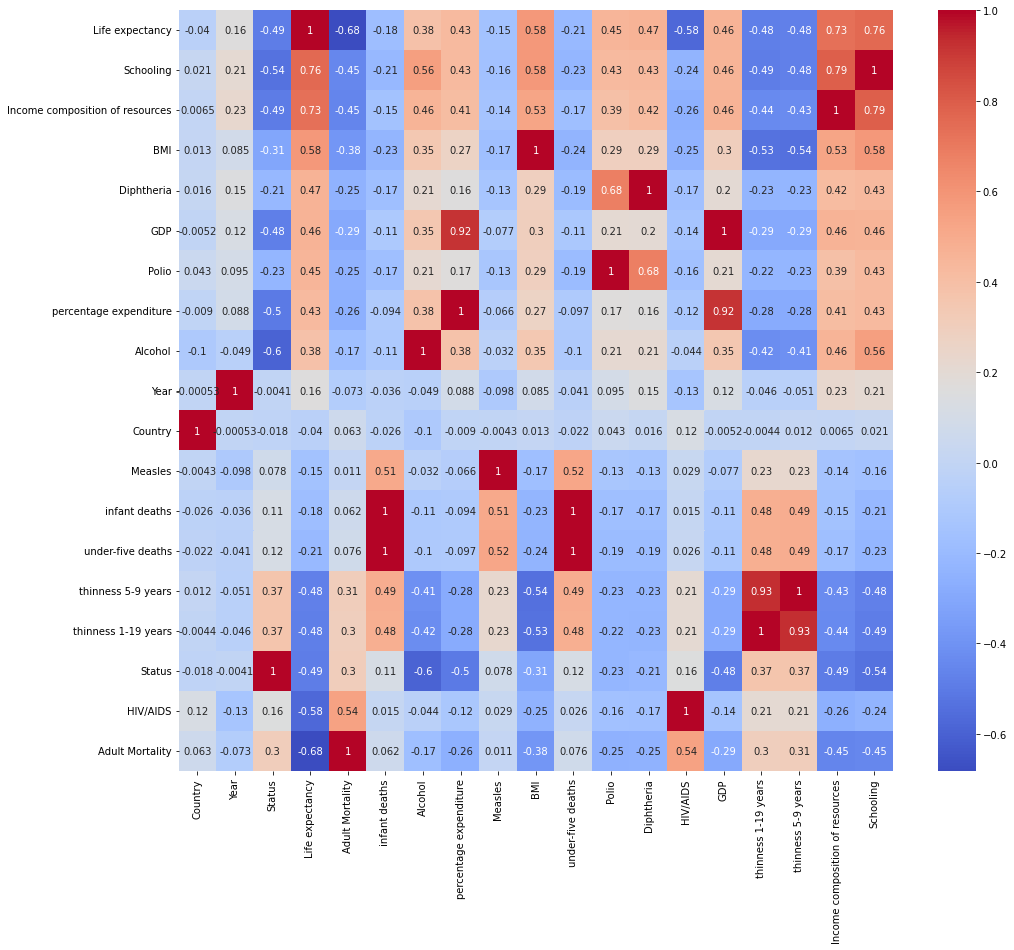

In [ ]:
corrmat = df.corr().sort_values('Life expectancy', ascending=False)
plt.subplots(figsize=(16,14))
sns.heatmap(corrmat,annot = True,cmap='coolwarm');

e) quais as features que mais possuem correlação (negativa ou positivamente) com a saída?

In [ ]:
# escreva um texto com sua resposta
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

"""

Features com maior correlação com Life expectancy são:
Schooling
Income composition of resources
BMI
thinness
HIV/AIDS
Adult Mortality

"""

'\n\nFeatures com maior correlação com Life expectancy são:\nSchooling\nIncome composition of resources\nBMI\nthinness\nHIV/AIDS\nAdult Mortality\n\n'

f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

In [ ]:
# escreva o nome das features redundantes
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

"""
'Infant deaths' e 'under-five deaths'
'thinness 5-9 years' e 'thinness 1-9 years'
"""

"\n'Infant deaths' e 'under-five deaths'\n'thinness 5-9 years' e 'thinness 1-9 years'\n"

g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

In [ ]:
# escreva o nome da feature redundante que você removeria
# justificando o porquê nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário
""""
Removeria 'Infant deaths', já que 'under-five deaths' tem uma maior correlação com a saída 
e removeria 'thinness 5-9 years', pois 'thinness 1-9 years' abrange a faixa de idade da feature anterior
"""


'"\nRemoveria \'Infant deaths\', já que \'under-five deaths\' tem uma maior correlação com a saída \ne removeria \'thinness 5-9 years\', pois \'thinness 1-9 years\' abrange a faixa de idade da feature anterior\n'

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

In [ ]:
# escreva um texto com sua resposta
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

# Sim, pois apresenta várias features com alta correlação com a variável de saída

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [ ]:
#remocao das variável de saída
X = df.drop(['Life expectancy'], axis=1)
y = df['Life expectancy']

In [ ]:
#dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train ,y_test  = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
656,40,2000,0,127.0,0,12.73,649.390987,9,54.7,0,94.0,93.0,0.1,4919.628690,2.1,2.1,0.739,12.2
1215,77,2002,1,189.0,177,0.05,43.178673,14492,16.7,222,8.0,7.0,0.1,899.555686,11.0,11.1,0.608,10.6
857,55,2008,1,322.0,6,0.49,11.765723,0,15.1,9,94.0,94.0,1.1,326.825642,9.1,9.1,0.406,5.2
2213,145,2002,1,174.0,0,3.30,208.168844,0,67.4,0,85.0,86.0,0.1,1631.417270,0.2,0.2,0.653,12.1
1941,126,2000,1,138.0,1,0.38,62.866575,15,45.9,1,99.0,99.0,0.1,861.185960,7.2,6.9,0.000,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,130,2014,1,278.0,10,0.01,208.231160,2299,47.9,13,64.0,73.0,0.7,2182.716565,1.3,1.3,0.511,10.0
1336,85,2009,1,118.0,4,0.59,668.744733,0,6.9,4,98.0,98.0,0.1,3492.139600,3.8,3.8,0.742,13.6
1373,87,2004,1,432.0,72,1.43,36.297752,20,15.9,112,73.0,73.0,13.2,458.884355,8.7,8.6,0.461,8.9
1583,100,2002,1,67.0,46,1.10,3.885395,92,14.8,75,79.0,64.0,24.7,29.979898,7.7,7.6,0.388,10.4


###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1612, 18)
(692, 18)
(1612,)
(692,)


###5. Execute a Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [ ]:
#modelo e predição

#model = LinearRegression(random_state=0)
#model = XGBRegressor(random_state=0)
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###6. Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

#### 6.1 Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

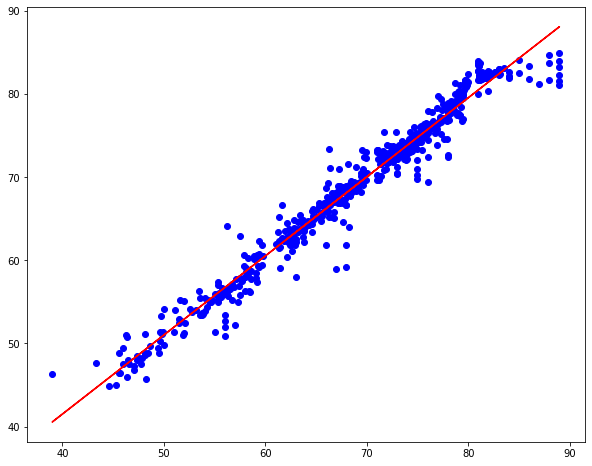

In [ ]:
# Visualização dos resultados obtidos

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue')

m, b = np.polyfit(y_test, y_pred, 1) #m = slope, b=intercept

plt.plot(y_test, m*y_test + b,  color='red')

plt.show()

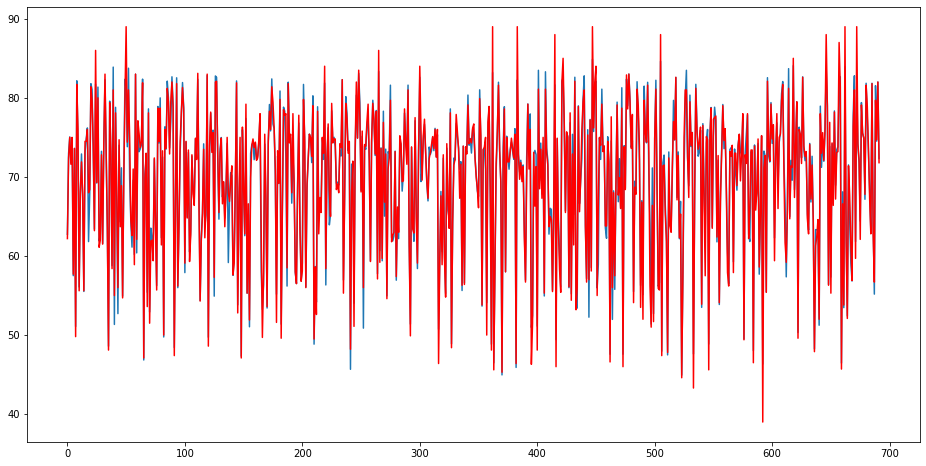

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(y_pred)),y_pred);
plt.plot(range(len(y_pred)),y_test, c='r');

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

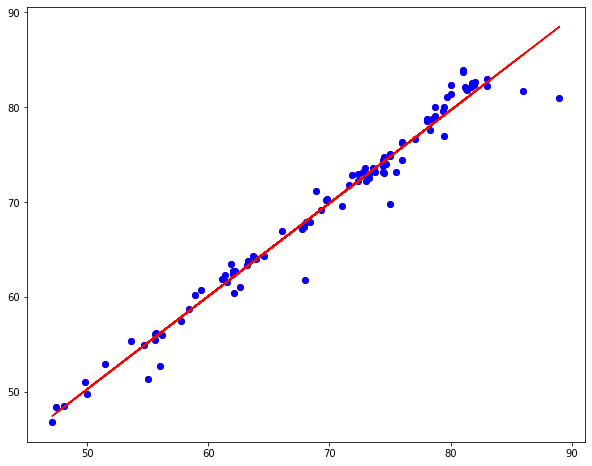

In [ ]:
y_test100 = y_test[0:100]
y_pred100 = y_pred[0:100]

plt.figure(figsize=(10, 8))
plt.scatter(y_test100, y_pred100, color='red')

coef = np.polyfit(y_test100, y_pred100, 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients

plt.plot(y_test100, y_pred100, 'bo', y_test100, poly1d_fn(y_test100), '-r')

plt.show()

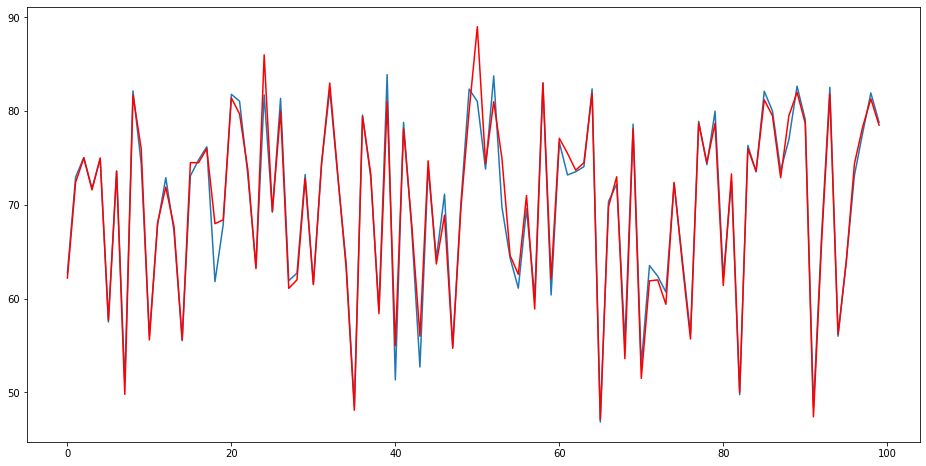

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(y_pred100)),y_pred100);
plt.plot(range(len(y_pred100)),y_test100, c='r');

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito).

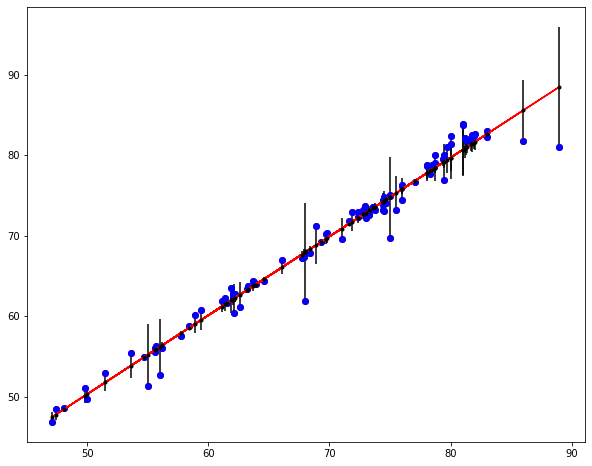

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test100, y_pred100, color='red')

coef = np.polyfit(y_test100, y_pred100, 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients

plt.plot(y_test100, y_pred100, 'bo', y_test100, poly1d_fn(y_test100), '-r')

plt.errorbar(y_test100, poly1d_fn(y_test100), yerr=poly1d_fn(y_test100) - y_pred100, fmt='.k')
plt.show()

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

In [ ]:
# escreva um texto com sua resposta
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

"""Dá pra melhorar, mas o modelo conseguiu predizer razoavelmente bem"""

'Dá pra melhorar, mas o modelo conseguiu predizer razoavelmente bem'

####6.2 Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (RMSE e R2) e verifique se sua impressão visual se confirma.

In [ ]:
# Avaliação dos resultados
# The mean squared error
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, y_pred, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_pred)))

RMSE: 1.706
Variance score: 0.968


In [ ]:
# escreva um texto justificando se sua
# impressão visual se confirmou ou não
# nesse espaço aqui, lembrando de deixar
# caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

"""Se confirmou sim"""

'Se confirmou sim'

####6.3 Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [ ]:
print('MÉDIA DO R2: {0:.3f}'.format(model_selection.cross_val_score(model, X_test, y_test, scoring='r2', cv=10).mean()))

MÉDIA DO R2: 0.944
